In [1]:
# import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# read in csv and create dataframe
csv = pd.read_csv('updated2.csv', encoding='latin-1')
csv.head()

,date,AverageTemperatureF,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,42.9224,6.068,1.737,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1869
1,1744-04-01,42.4184,5.788,3.624,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1878
2,1744-05-01,51.1592,10.644,1.283,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1878
3,1744-06-01,57.2918,14.051,1.347,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1878
4,1744-07-01,60.9476,16.082,1.396,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1878


In [3]:
# check dataframe datatypes
csv.dtypes

date                              object
AverageTemperatureF              float64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
year                               int64
dtype: object

In [4]:
# dropping null values
csv = csv.dropna()

In [5]:
csv.shape

(1048575, 9)

In [6]:
# renaming dataframe
df = pd.DataFrame(csv)

In [7]:
# finding unique cities, countries, and dates within the dataset
cities = df['City'].nunique()
countries = df['Country'].nunique()
dates = df['date'].nunique()

print(cities)
print(countries)
print(dates)

435
88
3002


In [8]:
# cleaning data by dropping "E", "W", "N" in Longitude and Latitude values
df['Longitude'] = df['Longitude'].str.replace('E', '')
df['Longitude'] = df['Longitude'].str.replace('W', '')
df['Latitude'] = df['Latitude'].str.replace('N', '')
df.to_csv('final.csv')

In [9]:
# changing date values to timestamps
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [10]:
# extracting year from dates and creating new column
df['year'] = df['date'].map(lambda x: 1*x.year)
df.head()

,date,AverageTemperatureF,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,42.9224,6.068,1.737,ÃÃÃÃ¤rhus,Denmark,0.80,124.55,1743
1,1744-04-01,42.4184,5.788,3.624,ÃÃÃÃ¤rhus,Denmark,0.80,124.55,1744
2,1744-05-01,51.1592,10.644,1.283,ÃÃÃÃ¤rhus,Denmark,0.80,124.55,1744
3,1744-06-01,57.2918,14.051,1.347,ÃÃÃÃ¤rhus,Denmark,0.80,124.55,1744
4,1744-07-01,60.9476,16.082,1.396,ÃÃÃÃ¤rhus,Denmark,0.80,124.55,1744


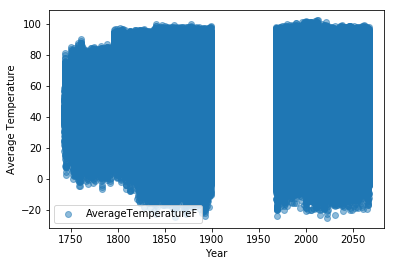

In [157]:
# plotting year vs average temperature
x = df['year']
y = df['AverageTemperatureF']

plt.scatter(x, y, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.legend()
plt.savefig("year_temp.jpg")
plt.show()

In [115]:
# getting average temperature by year for each lat&lon coordinate
df_avg = df.groupby(['year', 'Latitude', 'Longitude'], as_index=False).mean()
df_avg.head()

,year,Latitude,Longitude,AverageTemperatureF,AverageTemperature,AverageTemperatureUncertainty
0,1743,-16.87,72.00,45.4604,7.478,1.866
1,1743,-20.09,44.36,43.9736,6.652,2.015
2,1743,-20.09,47.77,43.9736,6.652,2.015
3,1743,-21.7,51.06,21.9992,-5.556,2.627
4,1743,-23.31,42.82,46.4774,8.043,1.841


In [116]:
# # Assign X (data) and y (target)
X = df_avg[[
        'year',
        'Latitude',
        'Longitude']].copy()

y = df_avg["AverageTemperatureF"].values.reshape(-1, 1)
print(X.shape, y.shape)

(59315, 3) (59315, 1)


In [117]:
# changing lat&lon from objects to float datatypes
X.loc[:, ["Latitude", "Longitude"]] = X.loc[:, ["Latitude", "Longitude"]].astype(float)

In [118]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,year,Latitude,Longitude
11660,1838,55.45,51.02
56625,2059,-18.48,70.99
47297,2028,-23.31,48.06
22839,1880,2.41,103.66
58533,2065,26.52,77.01


In [119]:
from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [120]:
# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [121]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
y_test_scaled.min()

-3.5967872385640356

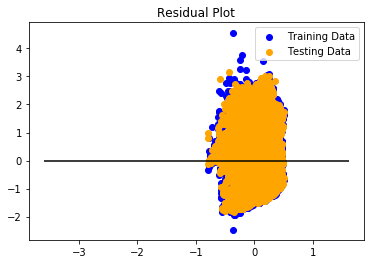

In [123]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
# scale predicted y values back to original domain
predictions = y_scaler.inverse_transform(predictions)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.savefig('model.jpg')
plt.show()

In [124]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
X_test_scaled.shape

MSE: 0.931389884850561, R2: 0.06002910149769647


(14829, 3)